In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [ ]:
path='https://raw.githubusercontent.com/mitulkumarahirwal/digits/master/digits.csv'
minst = np.genfromtxt(path, delimiter=",", skip_header=1)
minst.shape #100 samples(rows), first column (label) , 2 to 785 (pixel values 28x28)


(100, 785)

In [ ]:
X = minst[:,1:]
Y = minst[:,0]
X = tf.keras.utils.normalize(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
print(X.shape)
print(Y.shape)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(100, 784)
(100,)
(90, 784)
(90,)
(10, 784)
(10,)


In [ ]:
Y_train

array([9., 1., 3., 8., 9., 0., 4., 1., 8., 3., 0., 8., 5., 0., 8., 1., 6.,
       5., 4., 8., 3., 5., 5., 5., 9., 9., 0., 1., 0., 7., 9., 2., 9., 3.,
       4., 5., 4., 6., 5., 3., 2., 0., 8., 6., 7., 7., 7., 2., 0., 7., 5.,
       0., 2., 1., 1., 2., 4., 9., 6., 3., 1., 0., 8., 3., 6., 6., 2., 9.,
       7., 8., 4., 3., 4., 4., 7., 4., 6., 8., 0., 1., 7., 6., 7., 7., 2.,
       3., 5., 6., 2., 6.])

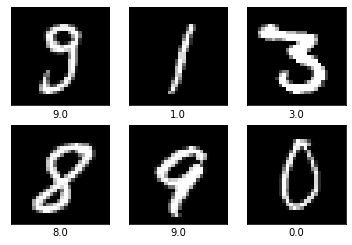

In [ ]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[i].reshape(28,28),cmap='gray')
  plt.xlabel(Y_train[i])
plt.show()

In [ ]:
# Create Model
model = tf.keras.models.Sequential()

In [ ]:
# Input layer, 3 Hidden layer, Output layer
model.add(tf.keras.layers.Flatten())   
model.add(tf.keras.layers.Dense(784,activation='relu'))  
model.add(tf.keras.layers.Dense(800,activation='relu'))  
model.add(tf.keras.layers.Dense(400,activation='relu'))   
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
### Configure the model
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
## cost function = , , mean_squared_error
## Optimizaer = Stochastic gradient descent

In [ ]:
# Model Training
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
3/3 [==============================] - 1s 31ms/step - loss: 2.2845 - accuracy: 0.2172
Epoch 2/10
3/3 [==============================] - 0s 30ms/step - loss: 2.1123 - accuracy: 0.3447
Epoch 3/10
3/3 [==============================] - 0s 35ms/step - loss: 1.8736 - accuracy: 0.3196
Epoch 4/10
3/3 [==============================] - 0s 30ms/step - loss: 1.5644 - accuracy: 0.3135
Epoch 5/10
3/3 [==============================] - 0s 30ms/step - loss: 1.4135 - accuracy: 0.2929
Epoch 6/10
3/3 [==============================] - 0s 30ms/step - loss: 1.2564 - accuracy: 0.3379
Epoch 7/10
3/3 [==============================] - 0s 30ms/step - loss: 1.1952 - accuracy: 0.4599
Epoch 8/10
3/3 [==============================] - 0s 32ms/step - loss: 1.1657 - accuracy: 0.4321
Epoch 9/10
3/3 [==============================] - 0s 29ms/step - loss: 1.3781 - accuracy: 0.3780
Epoch 10/10
3/3 [==============================] - 0s 30ms/step - loss: 1.3489 - accuracy: 0.3161


In [ ]:
# Model Test (Predictions)
predictions = model.predict(X_test)
predictions.shape

(10, 10)

In [ ]:
predictions[1]

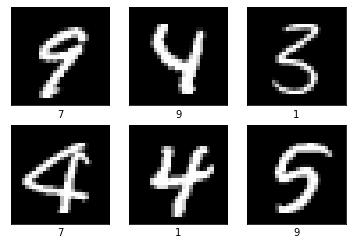

In [ ]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_test[i].reshape(28,28),cmap='gray')
  plt.xlabel(np.argmax(predictions[i]))
plt.show()

In [ ]:
np.argmax(predictions[1])

9

In [ ]:
predictions[1]

array([0.09877604, 0.10358731, 0.1004797 , 0.09462449, 0.09947746,
       0.09677737, 0.09707205, 0.10396172, 0.10121979, 0.104024  ],
      dtype=float32)

In [ ]:
loss,accu = model.evaluate(X_test,Y_test)
loss,accu

1/1 [==============================] - 0s 108ms/step - loss: 2.3044 - accuracy: 0.0667


(2.304368019104004, 0.06666667014360428)